In [100]:
# model_build.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Load dataset
df = pd.read_csv("loan predict.csv")
print("\n===== Dataset Overview =====")
print(df.head(), "\n")


===== Dataset Overview =====
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

In [102]:
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 



In [103]:
print(df.describe(include="all"), "\n")

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique 

In [104]:
# Check missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [105]:
# 2️⃣ Handle Missing Values
# ----------------------------
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing categorical columns with mode (most frequent)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numeric columns with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after cleaning:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [106]:
# --- 🧠 EDA Section ---
plt.style.use("ggplot")

C:\Users\amanp\AppData\Local\Temp\ipykernel_14400\4181081268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='Set2')


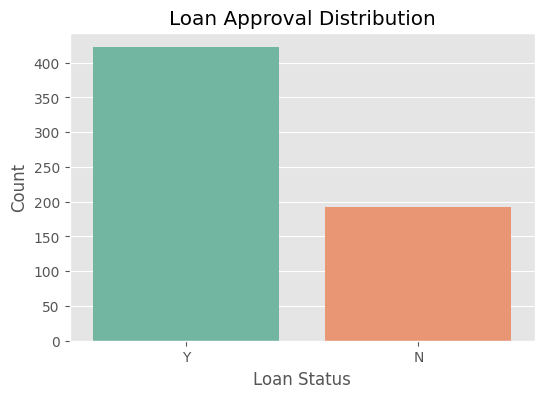

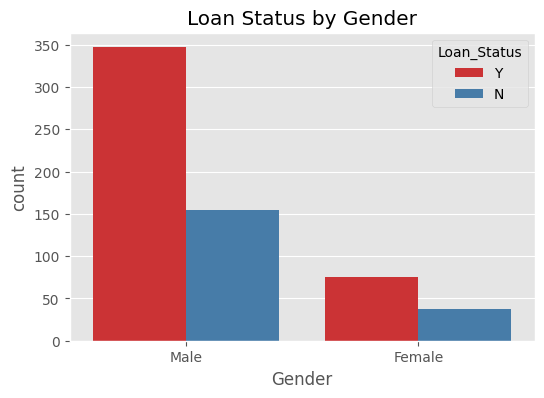

In [107]:
# Loan approval count
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
#plt.savefig("loan_status_distribution.png")
plt.show()
plt.close()

# Gender vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='Set1')
plt.title("Loan Status by Gender")
#plt.savefig("gender_vs_loanstatus.png")
plt.show()
plt.close()

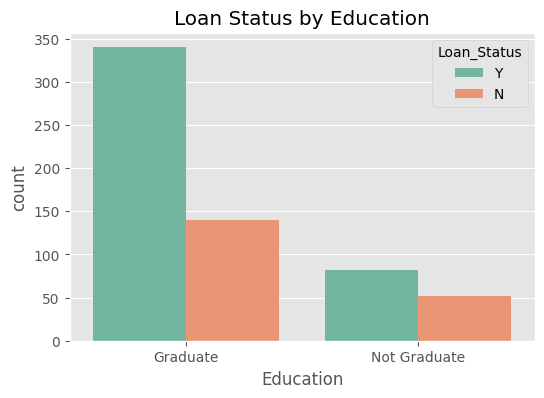

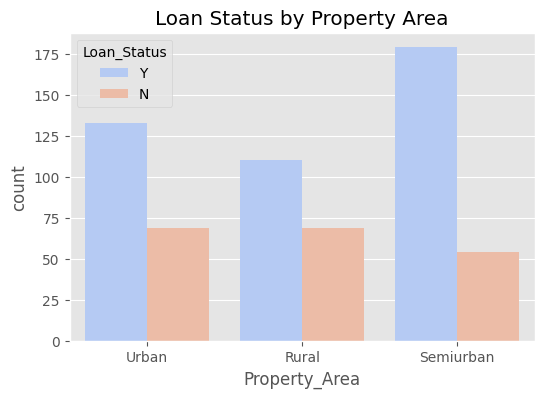

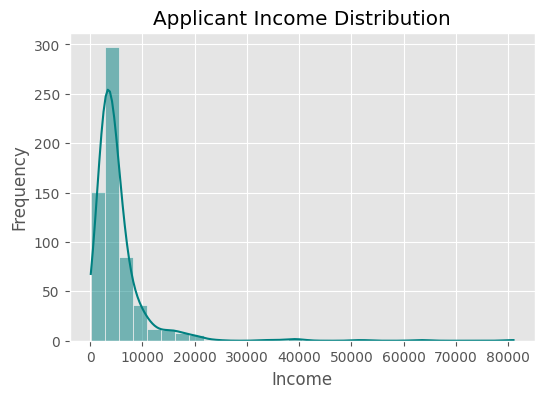

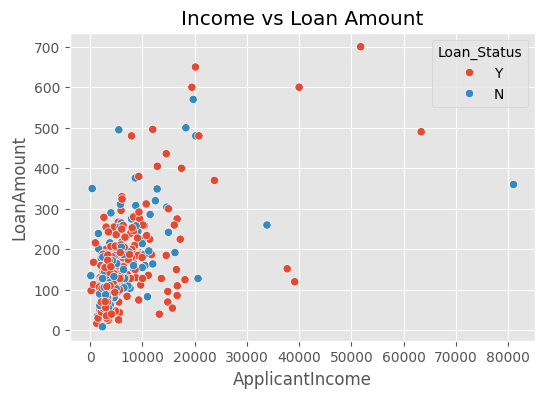

In [108]:
# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title("Loan Status by Education")
plt.show()
plt.close()

# Property Area vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='coolwarm')
plt.title("Loan Status by Property Area")
plt.show()
plt.close()

# Applicant Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='teal')
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()
plt.close()

# Loan Amount vs Income Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title("Income vs Loan Amount")
plt.show()
plt.close()

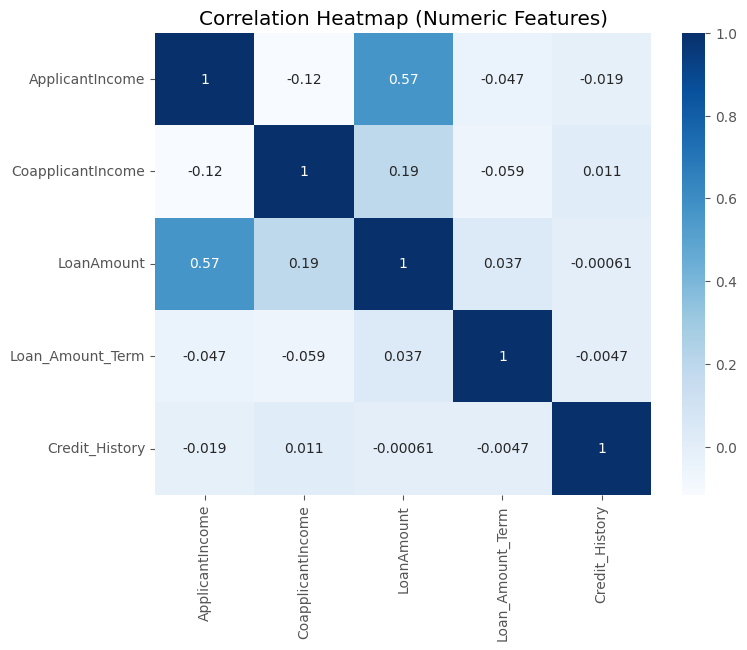

In [109]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
plt.close()

In [110]:
# Target column
target_col = "Loan_Status"

# Split X and y
X = df.drop(columns=[target_col])
y = df[target_col]

In [111]:
# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Drop ID if present
if "Loan_ID" in X.columns:
    X = X.drop(columns=["Loan_ID"])

# Identify numerical and categorical features
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()

In [112]:
# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

In [113]:
# Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [114]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [115]:
acc = model.score(X_test, y_test)
print(f"Model trained successfully with accuracy: {acc:.3f}")

Model trained successfully with accuracy: 0.821


In [116]:
# Save model & label encoder
joblib.dump(model, "loan_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump((num_cols, cat_cols), "feature_columns.pkl")

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


In [117]:
# 6️⃣ Predict from Saved Model (example)
# ----------------------------

# Reload model
loaded_model = joblib.load("loan_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

In [118]:
# Example input (replace values as needed)
example = pd.DataFrame({
    "Gender": ["Male"],
    "Married": ["Yes"],
    "Dependents": ["0"],
    "Education": ["Graduate"],
    "Self_Employed": ["No"],
    "ApplicantIncome": [5000],
    "CoapplicantIncome": [0],
    "LoanAmount": [150],
    "Loan_Amount_Term": [360],
    "Credit_History": [1.0],
    "Property_Area": ["Urban"]
})

# Predict
print("Example: Predicting using saved model...")

pred = loaded_model.predict(example)[0]
result = label_encoder.inverse_transform([pred])[0]
print(f"✅ Prediction for example input: {result}")

Example: Predicting using saved model...
✅ Prediction for example input: Y
